In [11]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Overview

First I load and look explore the data as shown in the tutorial.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)


10000

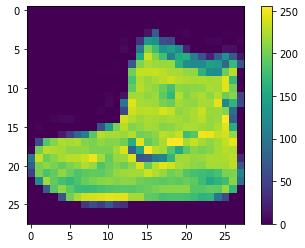

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0


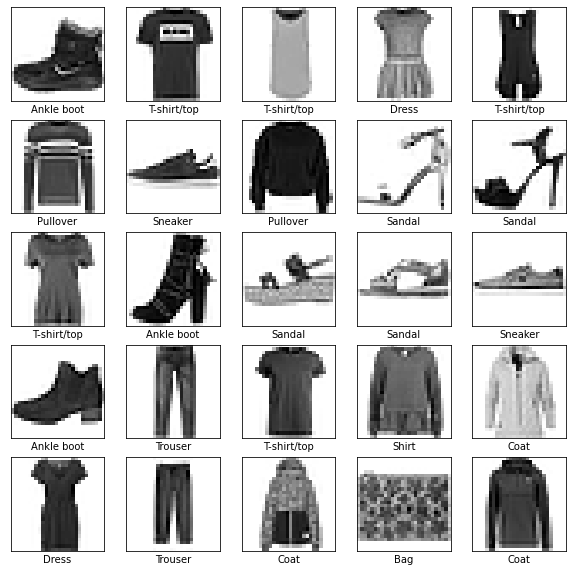

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#### Explore Node amount for Hidden Layers

To efficiently look at how changing the amount of nodes in the hidden layer affects the model I created a set for test results (test_results), and for models (models). The naming convention for each model is model_*number of nodes*, e.g. model_16;   test_results stores the validation loss and test accruacy for each model.

In [72]:
test_results = {}
models = {}
def fashion_model(HL_nodes):

    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(int(HL_nodes), activation='relu'),
    tf.keras.layers.Dense(10)
    ])


    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

#### Fit training data for each model

In [73]:
nodes = [16, 32, 64, 128]

for node in nodes:
   
    model = fashion_model(node)
    model.fit(train_images, train_labels, epochs=10,verbose = 0)


    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc)
    test_results['model_' + str(node)] = model.evaluate(test_images, test_labels, verbose=0)
    models['model_' + str(node)] = model
    
pd.DataFrame(test_results, index = ['Validation Loss','Test Accuracy']).T

313/313 - 0s - loss: 0.3931 - accuracy: 0.8605

Test accuracy: 0.8604999780654907
313/313 - 0s - loss: 0.3813 - accuracy: 0.8687

Test accuracy: 0.8687000274658203
313/313 - 0s - loss: 0.3511 - accuracy: 0.8777

Test accuracy: 0.8776999711990356
313/313 - 0s - loss: 0.3363 - accuracy: 0.8835

Test accuracy: 0.8834999799728394


,Validation Loss,Test Accuracy
model_16,0.393109,0.8605
model_32,0.381260,0.8687
model_64,0.351134,0.8777
model_128,0.336253,0.8835


#### Store Predictions for each model

In [99]:
predictions = {}
for node in nodes:
    
    probability_model = tf.keras.Sequential([models['model_' + str(node)], 
                                         tf.keras.layers.Softmax()])

    
    prediction = probability_model.predict(test_images)
    predictions['model_' + str(node)] = prediction
    
    print('\nmodel_' + str(node))
    print('\nPrediction: \n' + str(prediction[0]))
    print('\nMax_prediction: \n' + str(np.argmax(prediction[0])))
    print('\nTest_label: \n' + str(test_labels[0]))
    print('\n-------------------------')
    


model_16

Prediction: 
[4.6639572e-05 2.0616371e-06 8.5946747e-05 2.0006433e-05 6.2212134e-06
 2.0794399e-02 2.2385383e-03 6.2501989e-02 4.4713910e-03 9.0983278e-01]

Max_prediction: 
9

Test_label: 
9

-------------------------

model_32

Prediction: 
[1.9172231e-07 2.1839817e-09 2.7082365e-07 1.6378623e-07 1.1614715e-05
 4.0546909e-02 1.5394689e-05 1.8810198e-02 1.7441673e-05 9.4059783e-01]

Max_prediction: 
9

Test_label: 
9

-------------------------

model_64

Prediction: 
[1.4806190e-07 1.0275341e-09 3.9157982e-07 1.1132455e-06 7.9633855e-07
 6.4757987e-05 1.3775357e-06 1.9880183e-02 6.2996526e-07 9.8005062e-01]

Max_prediction: 
9

Test_label: 
9

-------------------------

model_128

Prediction: 
[3.4134057e-06 1.3316733e-09 1.6411353e-05 8.7958369e-09 2.0716090e-08
 1.4063359e-03 5.0846334e-05 5.0871816e-02 2.1145330e-07 9.4765091e-01]

Max_prediction: 
9

Test_label: 
9

-------------------------


In [100]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


#### Example Prediction

Here I choose the same image from the tutorial to visualize the prediction capability of each model. We see that all the models have a prediction higher than 90% with model_64 having the highest at 98%.

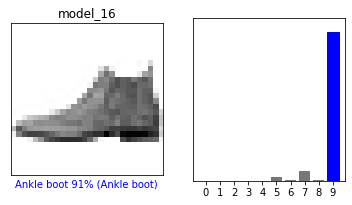

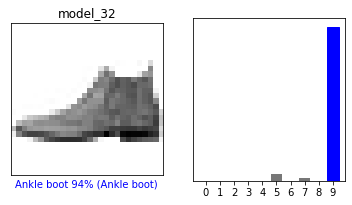

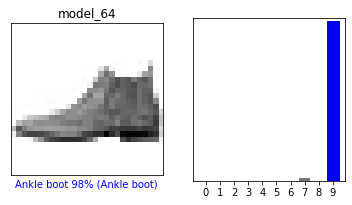

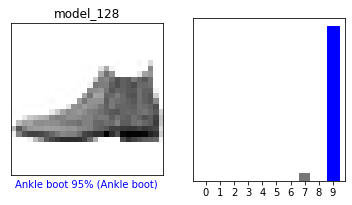

In [101]:
i = 0
for node in nodes:
    
    predict = predictions['model_' + str(node)][i]

    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.title('model_' + str(node))
    plot_image(i, predict, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predict,  test_labels)
    plt.show()

#### Of course it isn't always so great

In fact we see that the models with *more* nodes end up performing worse for this example!

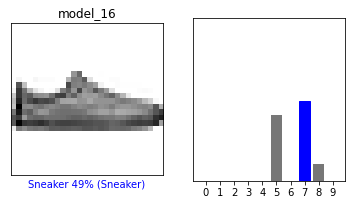

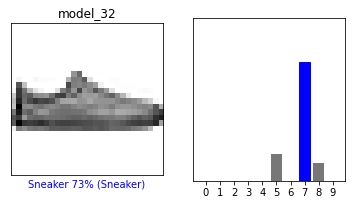

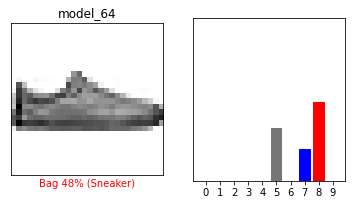

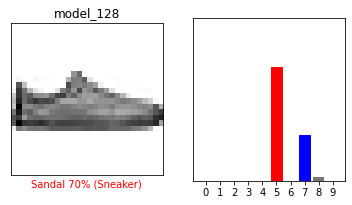

In [140]:

i = 12

for node in nodes:
    predict = predictions['model_' + str(node)][i]
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.title('model_' + str(node))
    plot_image(i,predict, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predict,  test_labels)
    plt.show()

#### Detour Over

Here we continue with following the same steps of the tutorial, only I've modified the code to work with the modifieder tutorial above.

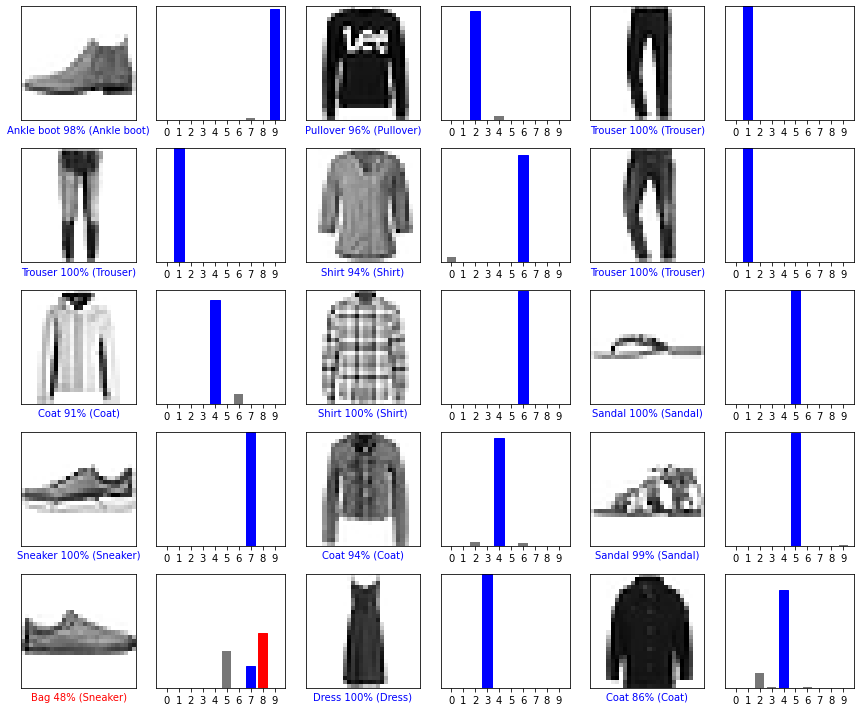

In [142]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

node = 64 # choose model based on node number: [16, 32, 64, 128]

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions['model_' + str(node)][i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions['model_' + str(node)][i], test_labels)
plt.tight_layout()
plt.show()

In [143]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [144]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [145]:
predictions_single = models['model_' + str(node)].predict(img)

print(predictions_single)


[[ -0.8557587 -15.612343    9.926331  -11.666523    6.6622257 -21.884693
    3.233114  -23.082981  -12.492064  -28.582138 ]]


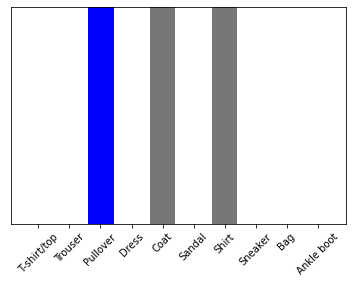

In [146]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [135]:
np.argmax(predictions_single[0])


2